# Loading Libraries and Data

pip install jupyterthemes

!jt -l

# making code more structured
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# library to split data
from sklearn.model_selection import train_test_split

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [3]:
# importing and changing directory
import os

os.chdir("D:\Python")
os.getcwd()

'D:\\Python'

<IPython.core.display.Javascript object>

In [5]:
# loading data
INNHotelsGroup = pd.read_csv("INNHotelsGroup.csv")

# creating copy of data
df = INNHotelsGroup.copy()

<IPython.core.display.Javascript object>

# EDA and Preprocessing

In [7]:
# checking the shape of the data
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [8]:
# view sample of the data
df.sample(n=10, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


<IPython.core.display.Javascript object>

In [9]:
# viewing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
# checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**

 - There are no duplicate values and no null values.
 - The Booking_ID column does not look necessary since we have the python index ID we can use so we will likely drop this column.
 - None of the data types look to need a change so this is good as well.

In [12]:
# filtering object type columns
cat_columns = df.describe(include=["object"]).columns
cat_columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [14]:
# checking the unique values in each categorical column
for i in cat_columns:
    print("Unique values in", i, "are:")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Booking_ID are:
INN32697    1
INN24632    1
INN04223    1
INN20130    1
INN01931    1
           ..
INN01028    1
INN31122    1
INN01308    1
INN36205    1
INN26289    1
Name: Booking_ID, Length: 36275, dtype: int64
**************************************************
Unique values in type_of_meal_plan are:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in room_type_reserved are:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are:
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
************************

<IPython.core.display.Javascript object>

In [71]:
# dropping Booking_ID column because this is an unnecessary column
df.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [72]:
# viewing df head
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,lead_time_log
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,5.411646
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,1.609438
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,0.000000
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,5.351858
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,3.871201


<IPython.core.display.Javascript object>

In [15]:
# checking the summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

### Univariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale
# we are using this plot for our non-categorical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

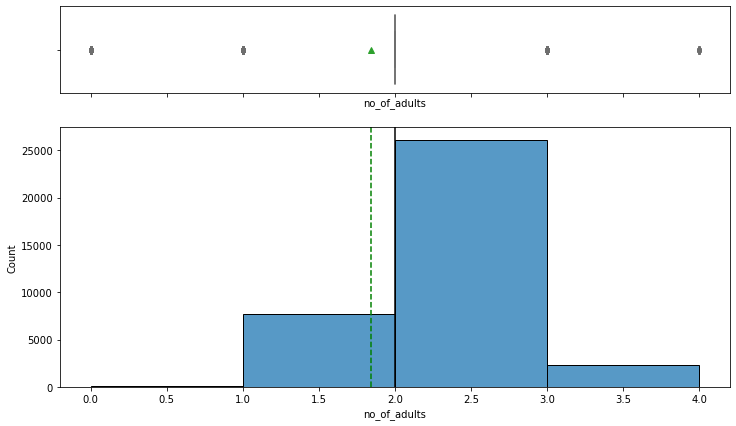

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, "no_of_adults", bins=4)

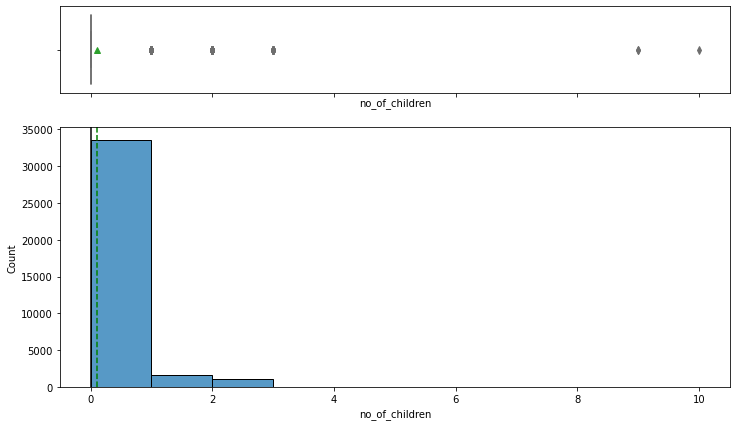

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(df, "no_of_children", bins=10)

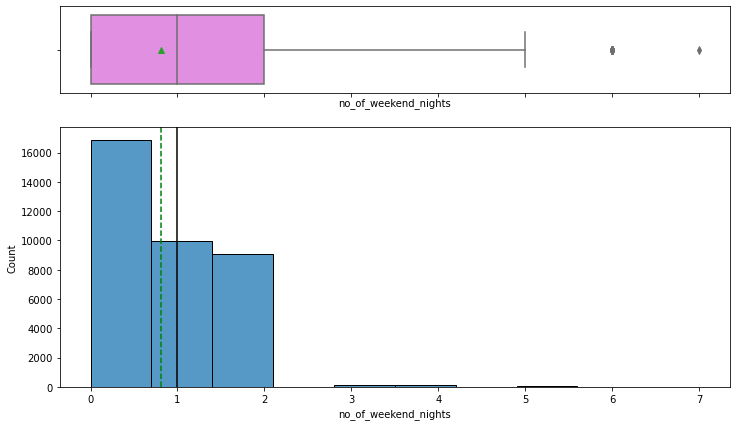

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "no_of_weekend_nights", bins=10)

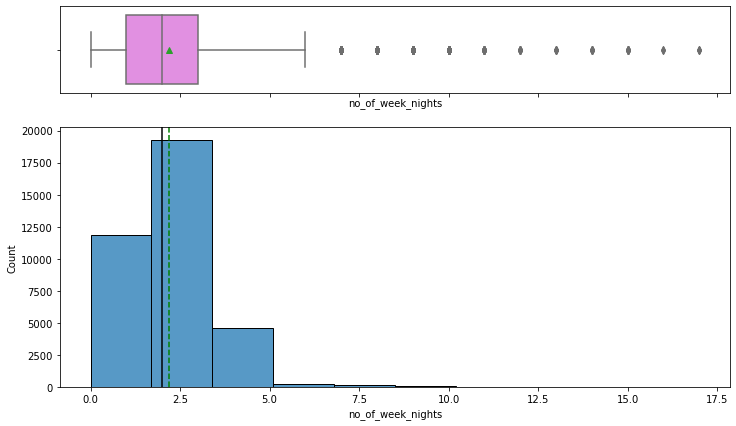

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(df, "no_of_week_nights", bins=10)

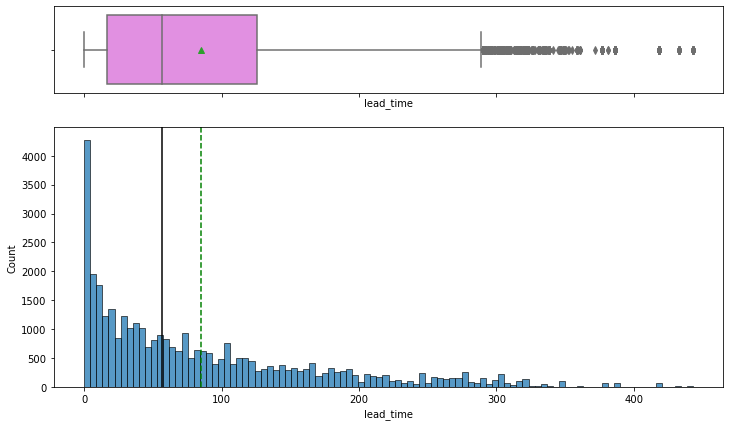

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "lead_time", bins=100)

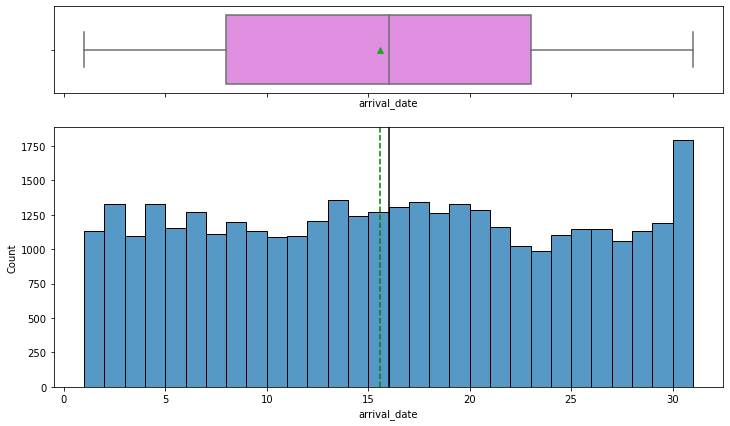

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "arrival_date", bins=30)

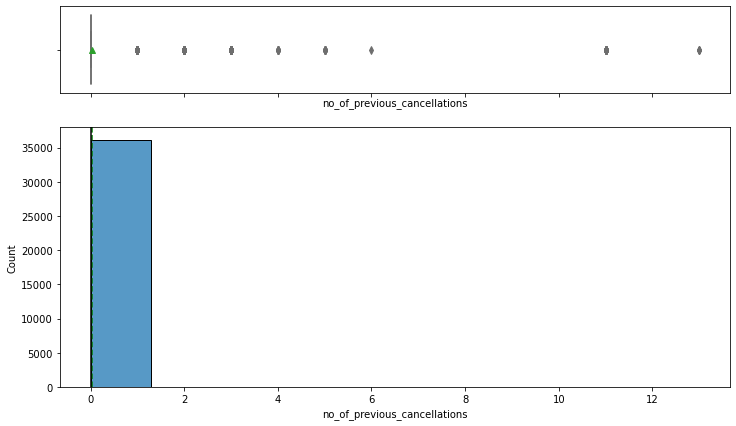

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "no_of_previous_cancellations", bins=10)

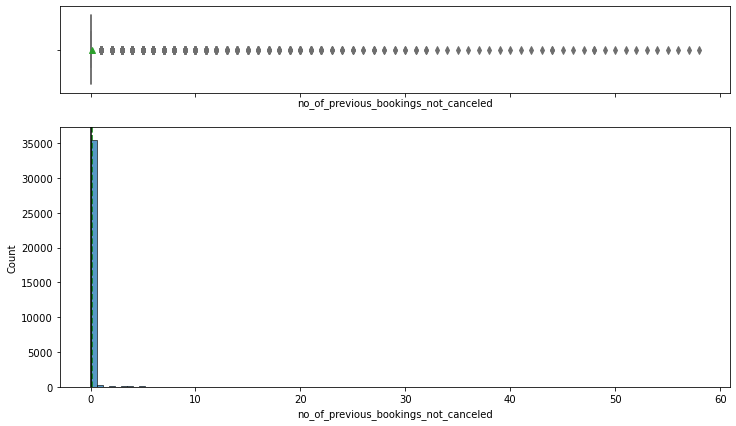

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled", bins=100)

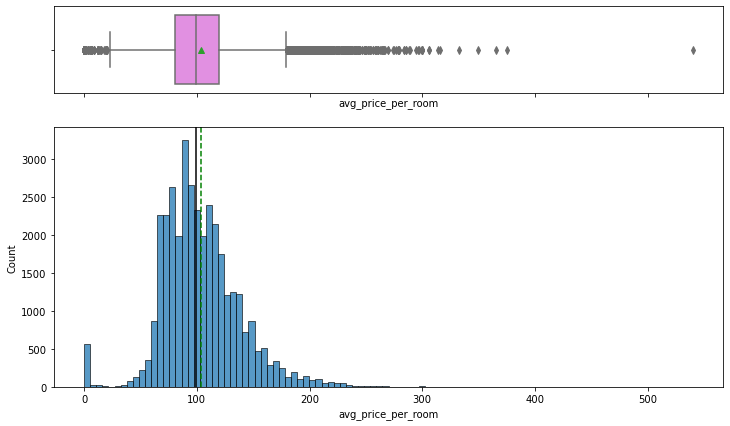

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(df, "avg_price_per_room", bins=100)

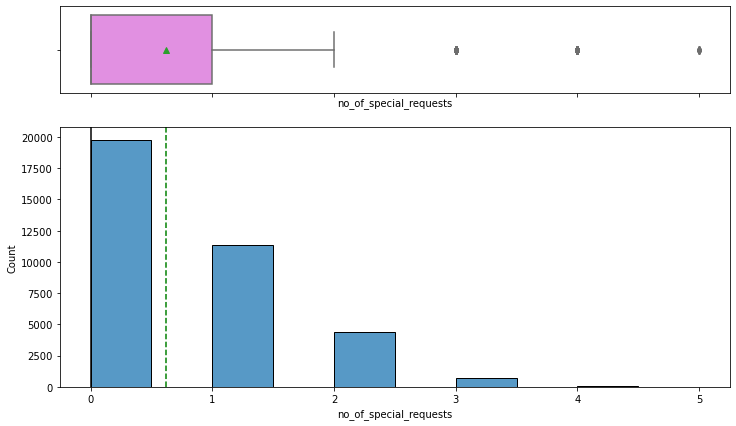

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(df, "no_of_special_requests", bins=10)

In [41]:
# function to create labeled barplots
# we used this plot for our categorical variables, instead of histogram_boxplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

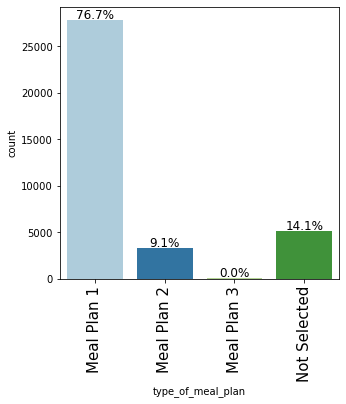

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

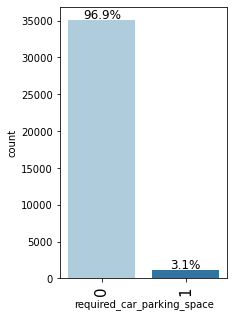

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "required_car_parking_space", perc=True)

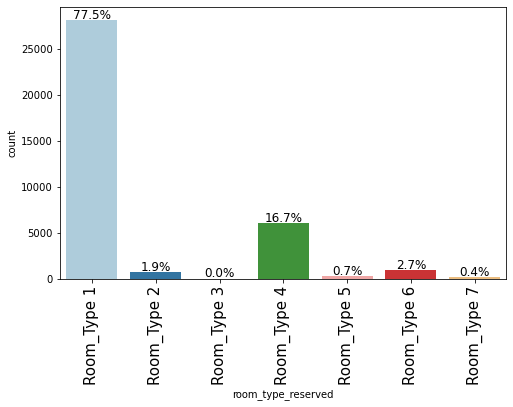

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "room_type_reserved", perc=True)

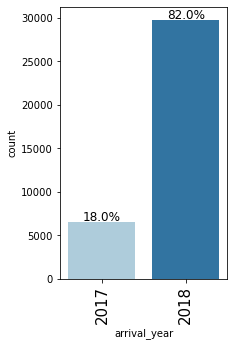

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(df, "arrival_year", perc=True)

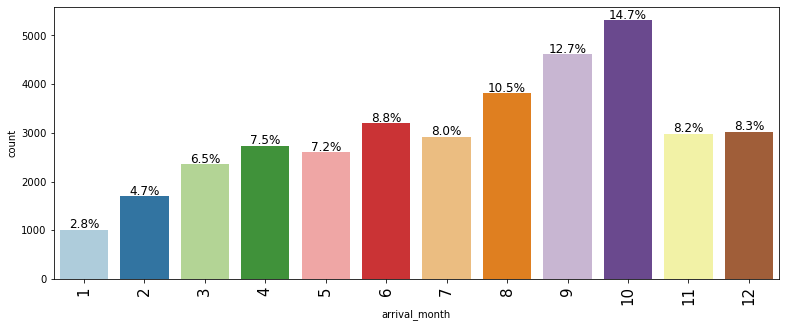

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df, "arrival_month", perc=True)

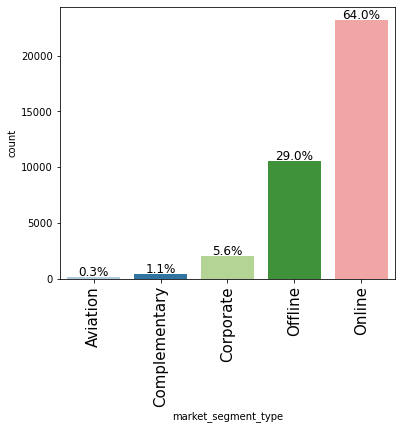

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(df, "market_segment_type", perc=True)

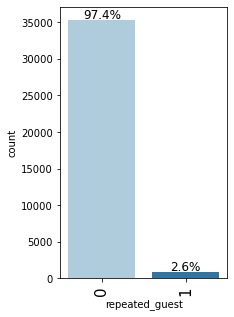

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(df, "repeated_guest", perc=True)

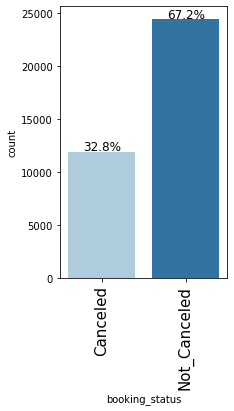

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df, "booking_status", perc=True)

**Observations:**

 - Most often 2 adults are booking the room, and no kids.
 - Most weeknight booking are between 2-3 nights.
 - The majority of weekend nights booked are zero.
 - The day of the month booked throughout the month is fairly even, with a slight exception toward the end of month.
 - The lead_time and avg_price_per_room look skewed so this needs to be addressed.
 - The no_of_previous_bookings_not_canceled has many outliers but because we have so many outliers and the majority of this column hovers around the value of zero, if we treat these outliers, we would be creating a constant so this column will keep the outliers.
 - 76.7% of bookings choose Meal Plan 1, 9.1% choose Meal Plan 2, almost none choose Meal Plan 3 and 14.1% do not choose a meal plan.
 - 96.9% of bookings do not require a parking space for their car.
 - 77.5% book Room_Type 1, 16.7% book Room_Type 4.
 - 18% of arrivals are in 2017, 82% of arrivals are in 2018.
 - January is the slowest month and the arrivals grow fairly steadily until October (the highest number of arrivals), then drops for November and December.
 - The majority (64%) of bookings are online, while 29% are offline bookings. Aviatory, Complimentary and Corporate bookings make up the rest.
 - 67.2% of bookings are not cancelled, leaving a cancellation rate of 32.8%.

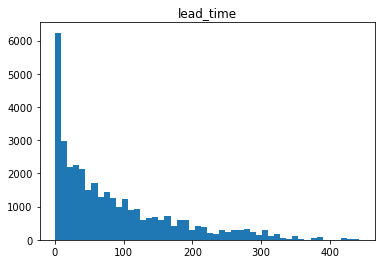

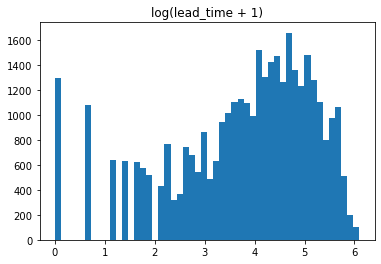

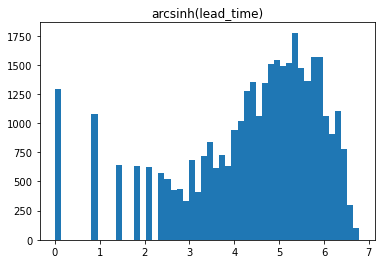

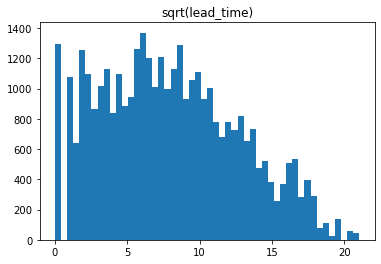

<IPython.core.display.Javascript object>

In [69]:
# viewing the transformation options to deal with skewness for lead_time
plt.hist(df["lead_time"], 50)
plt.title("lead_time")
plt.show()
plt.hist(np.log(df["lead_time"] + 1), 50)
plt.title("log(lead_time + 1)")
plt.show()
plt.hist(np.arcsinh(df["lead_time"]), 50)
plt.title("arcsinh(lead_time)")
plt.show()
plt.hist(np.sqrt(df["lead_time"]), 50)
plt.title("sqrt(lead_time)")
plt.show()

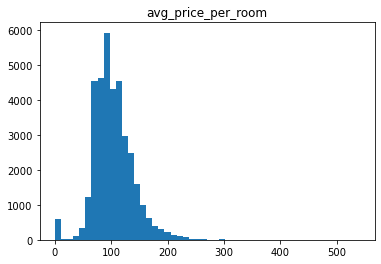

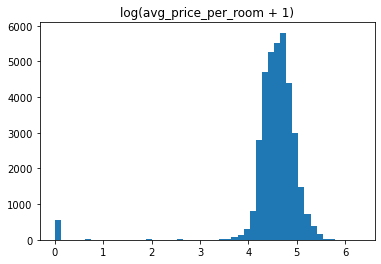

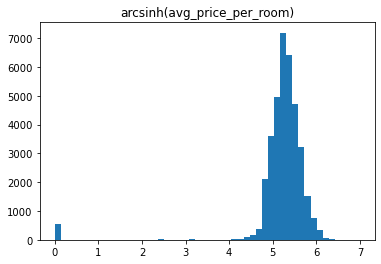

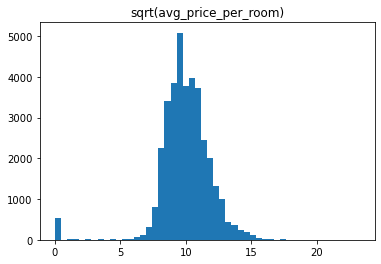

<IPython.core.display.Javascript object>

In [68]:
# viewing the transformation options to deal with skewness for avg_price_per_room
plt.hist(df["avg_price_per_room"], 50)
plt.title("avg_price_per_room")
plt.show()
plt.hist(np.log(df["avg_price_per_room"] + 1), 50)
plt.title("log(avg_price_per_room + 1)")
plt.show()
plt.hist(np.arcsinh(df["avg_price_per_room"]), 50)
plt.title("arcsinh(avg_price_per_room)")
plt.show()
plt.hist(np.sqrt(df["avg_price_per_room"]), 50)
plt.title("sqrt(avg_price_per_room)")
plt.show()

**Observations:** The sqrt transformations seem to be the best options so we will create columns for lead_time_sqrt and avg_price_per_room_sqrt, and then drop lead_time and avg_price_per_room. 

In [76]:
# using sqrt to deal with skewness for both lead_time and avg_price_per_room
df["lead_time_sqrt"] = np.sqrt(df["lead_time"])
df["avg_price_per_room"] = np.sqrt(df["avg_price_per_room"])
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'lead_time_sqrt'],
      dtype='object')

<IPython.core.display.Javascript object>

I made a mistake above. I should have created a copy of the df and then made the changes to create the _sqrt columns. Because I didn't, the avg_price_per_room_sqrt will need to be used to "rename" the avg_price_per_room column (which is actually the _sqrt colunn). 

In [77]:
# fixing mistake above
# renaming column to append _sqrt
df["avg_price_per_room_sqrt"] = df["avg_price_per_room"]
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'lead_time_sqrt', 'avg_price_per_room_sqrt'],
      dtype='object')

<IPython.core.display.Javascript object>

In [78]:
# dropping the lead_time and avg_price_per_room columns
df.drop(["lead_time", "avg_price_per_room"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [80]:
# viewing the df head
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,lead_time_sqrt,avg_price_per_room_sqrt
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,0,Not_Canceled,14.966630,2.839412
1,2,0,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,1,Not_Canceled,2.236068,3.213814
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,0,Canceled,1.000000,2.783158
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,0,Canceled,14.525839,3.162278
4,2,0,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,0,Canceled,6.928203,3.117870


<IPython.core.display.Javascript object>

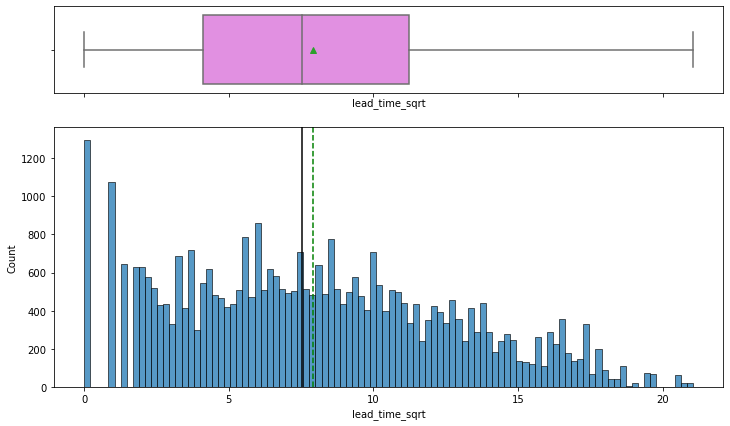

<IPython.core.display.Javascript object>

In [82]:
# viewing the new lead_time_sqrt columns to check for skewness
histogram_boxplot(df, "lead_time_sqrt", bins=100)

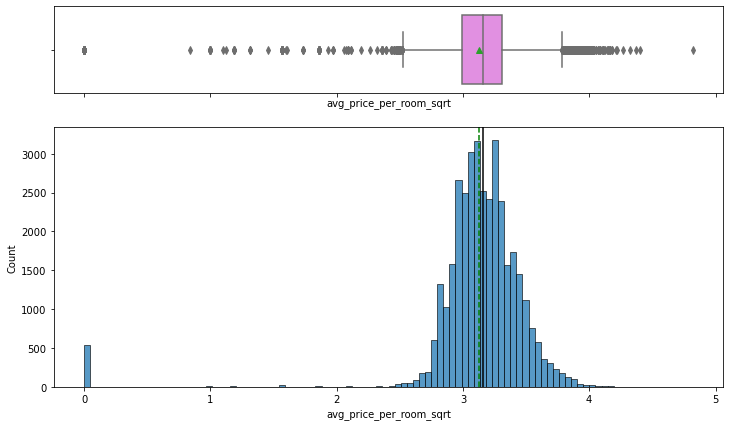

<IPython.core.display.Javascript object>

In [84]:
# viewing the new avg_price_per_room_sqrt columns to check for skewness
histogram_boxplot(df, "avg_price_per_room_sqrt", bins=100)

**Observations:** The two new columns of lead_time_sqrt and avg_price_per_room_sqrt look much better than before. Must be careful before making these changes by creating another copy of data and then compare.

### Bivariate Analysis

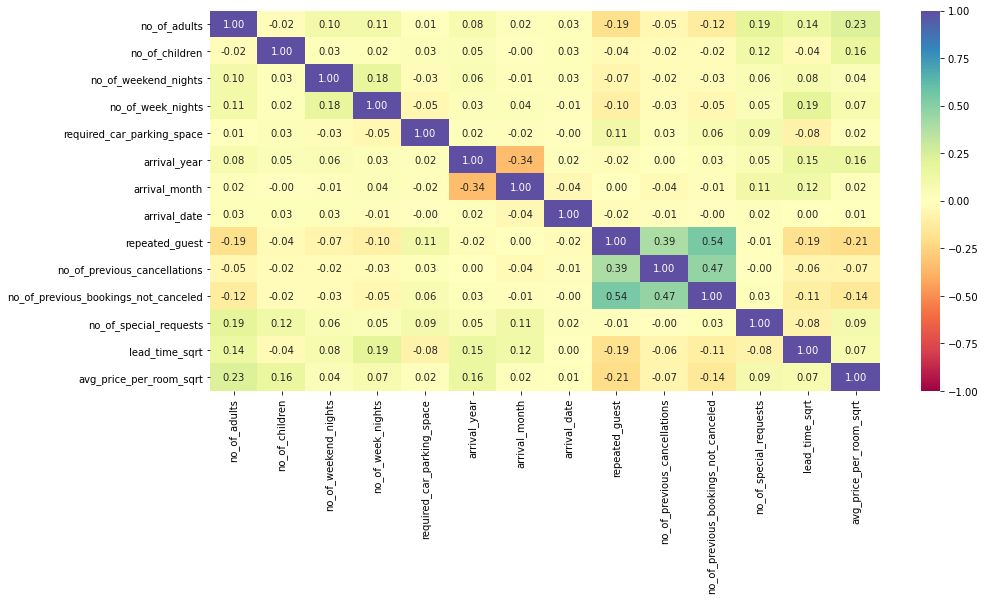

<IPython.core.display.Javascript object>

In [85]:
# Viewing  correlations
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [92]:
# function to create a stacked barplot for categorical columns
def stacked_barplot(data, predictor, target):
    """
    Print the category coutns and plot a stacked bar chart
    
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


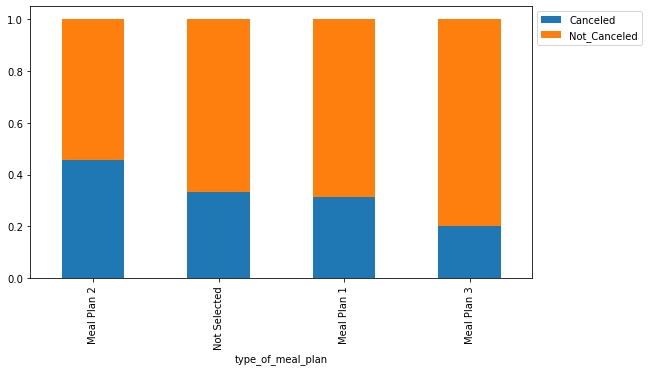

<IPython.core.display.Javascript object>

In [93]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


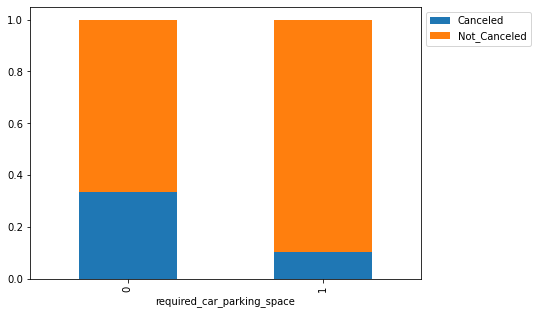

<IPython.core.display.Javascript object>

In [94]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


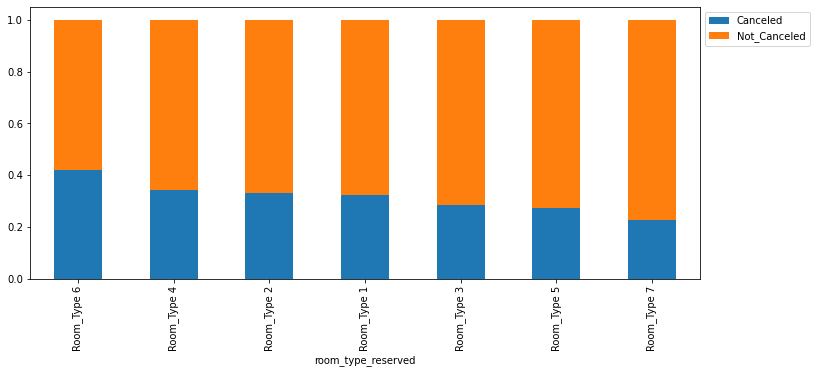

<IPython.core.display.Javascript object>

In [95]:
stacked_barplot(df, "room_type_reserved", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


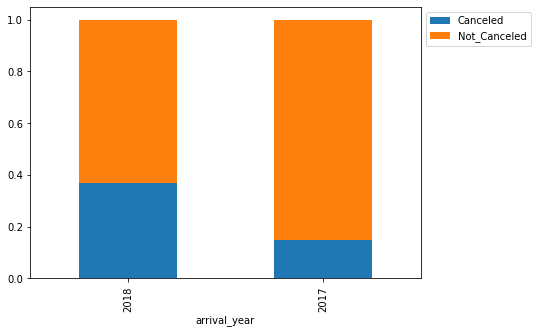

<IPython.core.display.Javascript object>

In [96]:
stacked_barplot(df, "arrival_year", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


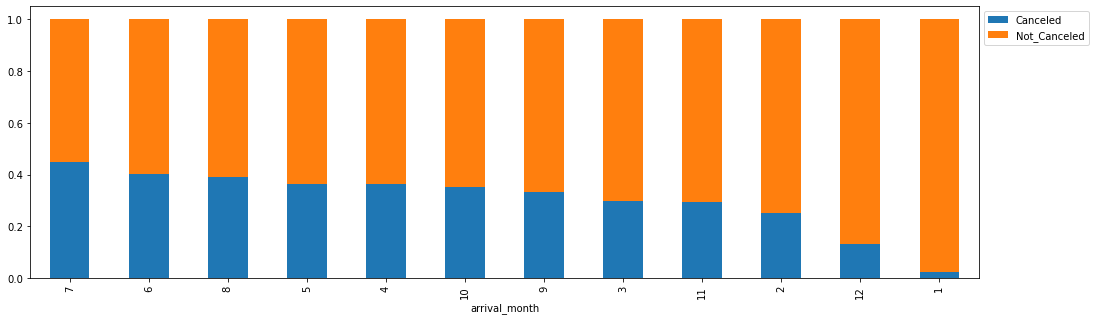

<IPython.core.display.Javascript object>

In [97]:
stacked_barplot(df, "arrival_month", "booking_status")

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


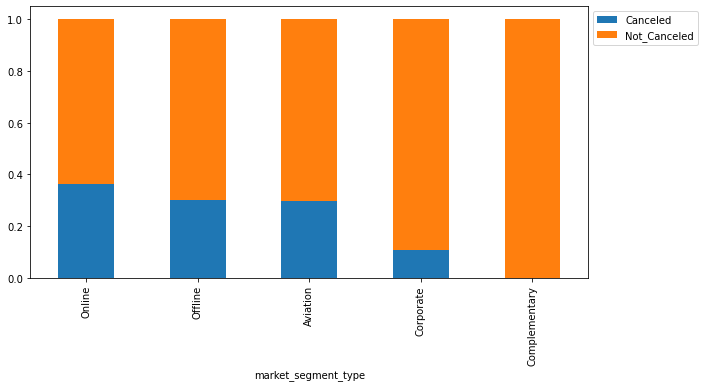

<IPython.core.display.Javascript object>

In [98]:
stacked_barplot(df, "market_segment_type", "booking_status")

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


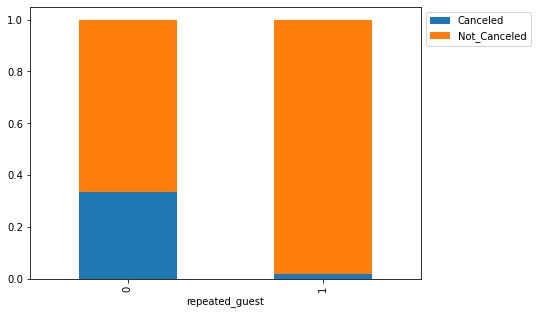

<IPython.core.display.Javascript object>

In [99]:
stacked_barplot(df, "repeated_guest", "booking_status")

In [100]:
# function to plot distributions with respect to target variable
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot wrt target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (w/o outliers) wrt target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

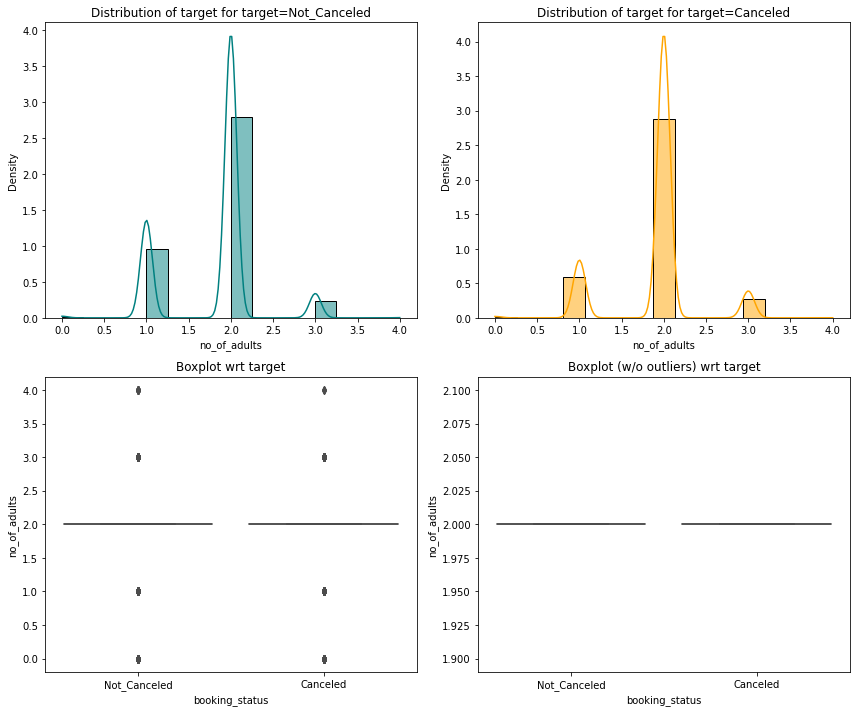

<IPython.core.display.Javascript object>

In [101]:
distribution_plot_wrt_target(df, "no_of_adults", "booking_status")

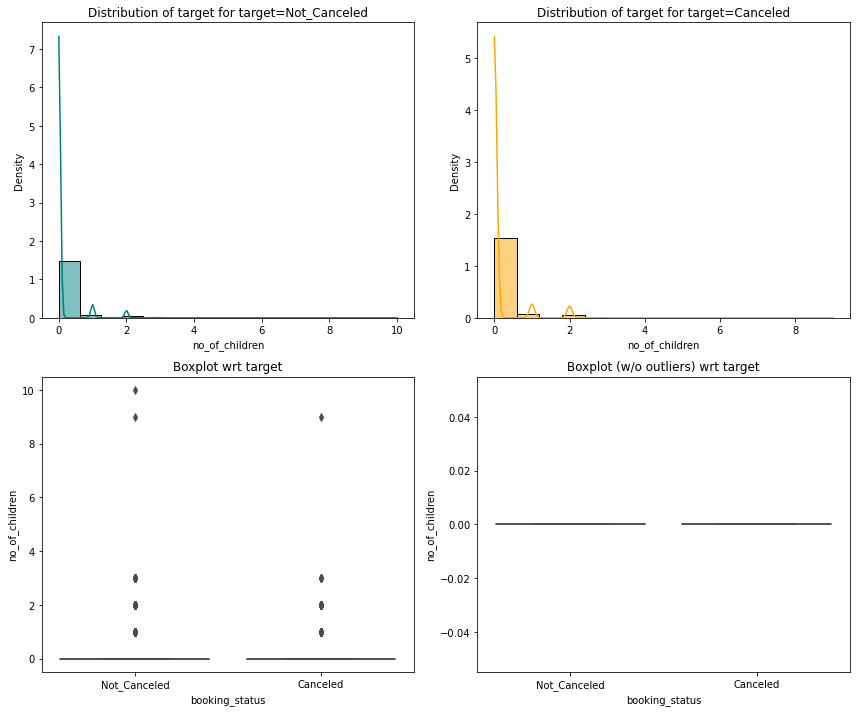

<IPython.core.display.Javascript object>

In [102]:
distribution_plot_wrt_target(df, "no_of_children", "booking_status")

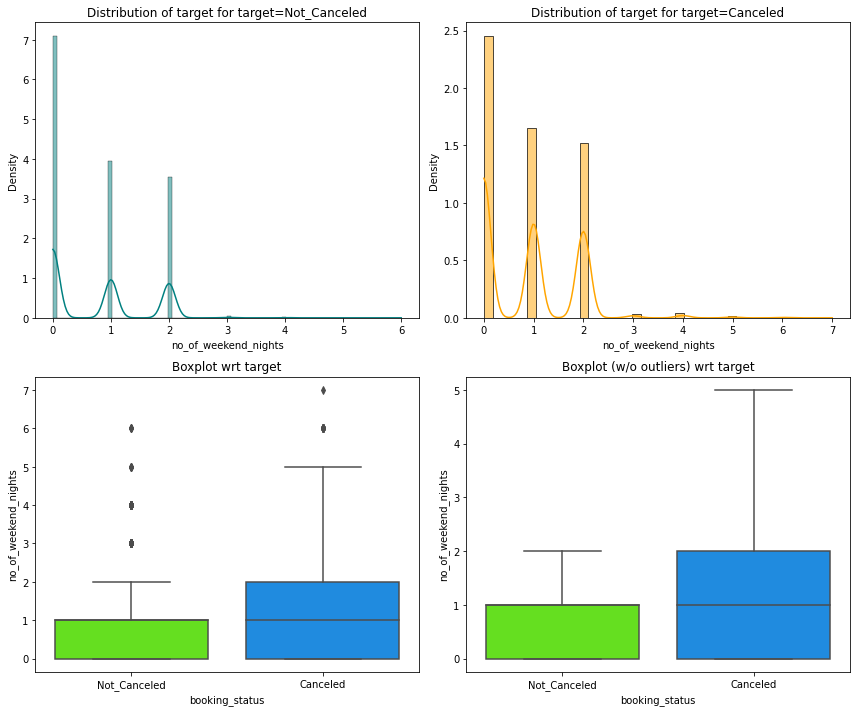

<IPython.core.display.Javascript object>

In [103]:
distribution_plot_wrt_target(df, "no_of_weekend_nights", "booking_status")

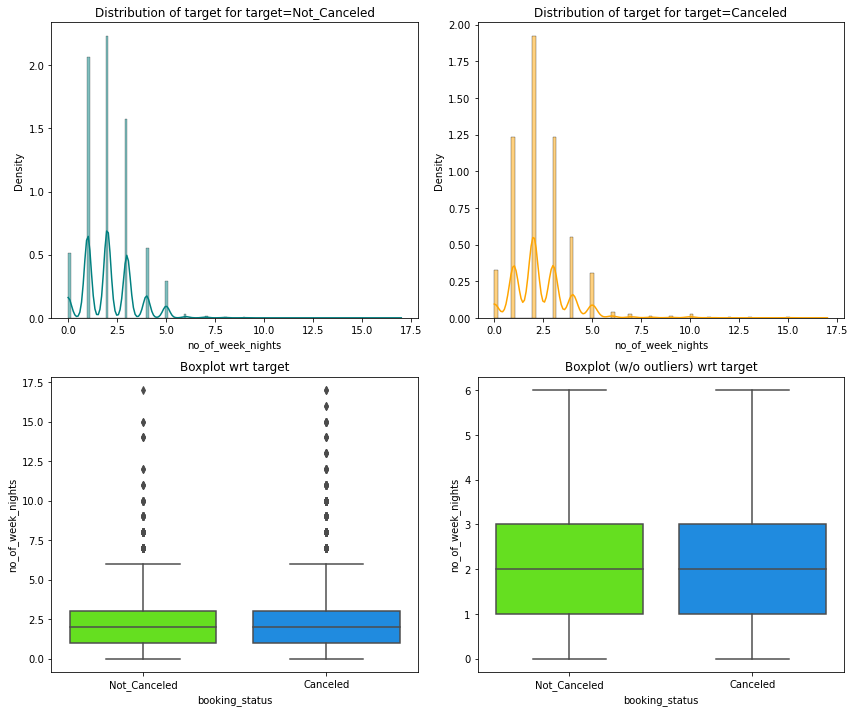

<IPython.core.display.Javascript object>

In [104]:
distribution_plot_wrt_target(df, "no_of_week_nights", "booking_status")

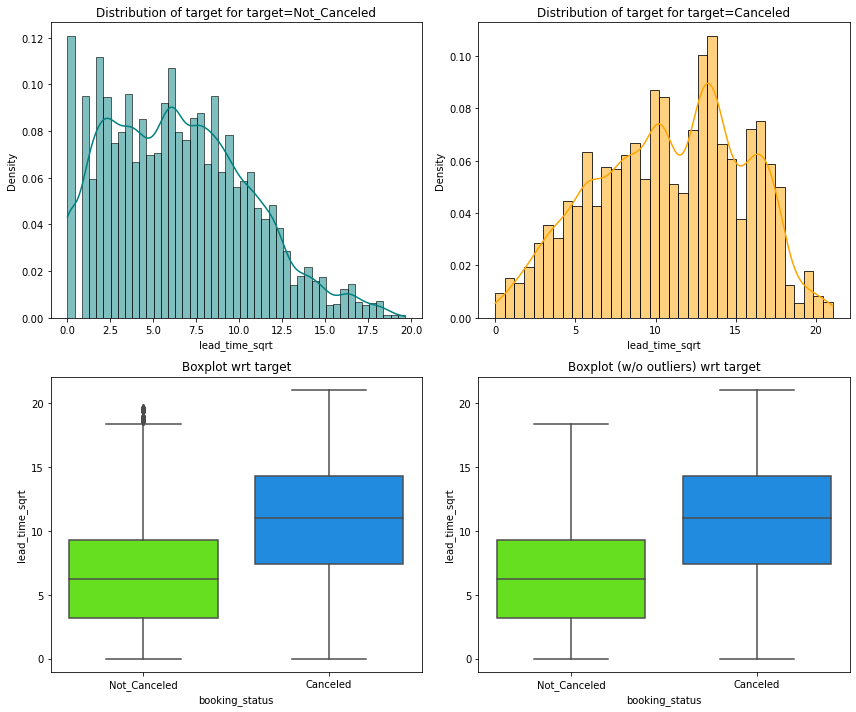

<IPython.core.display.Javascript object>

In [105]:
distribution_plot_wrt_target(df, "lead_time_sqrt", "booking_status")

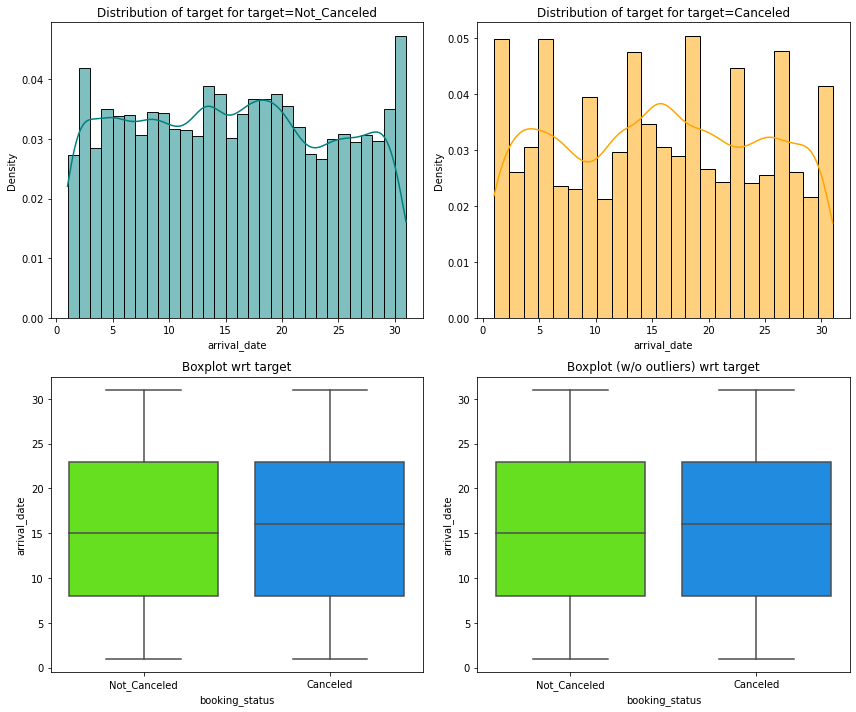

<IPython.core.display.Javascript object>

In [106]:
distribution_plot_wrt_target(df, "arrival_date", "booking_status")

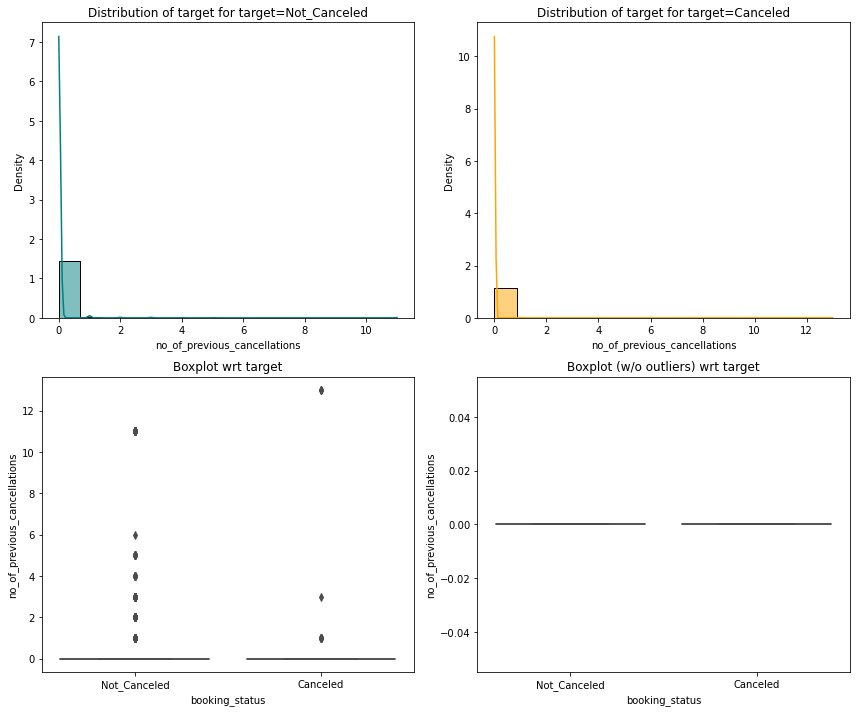

<IPython.core.display.Javascript object>

In [107]:
distribution_plot_wrt_target(df, "no_of_previous_cancellations", "booking_status")

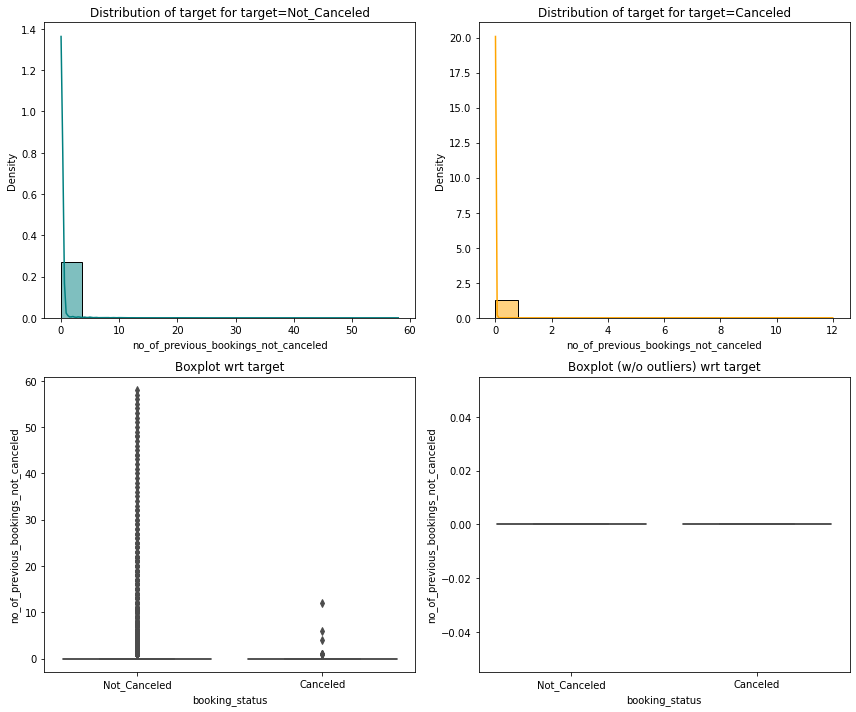

<IPython.core.display.Javascript object>

In [109]:
distribution_plot_wrt_target(
    df, "no_of_previous_bookings_not_canceled", "booking_status"
)

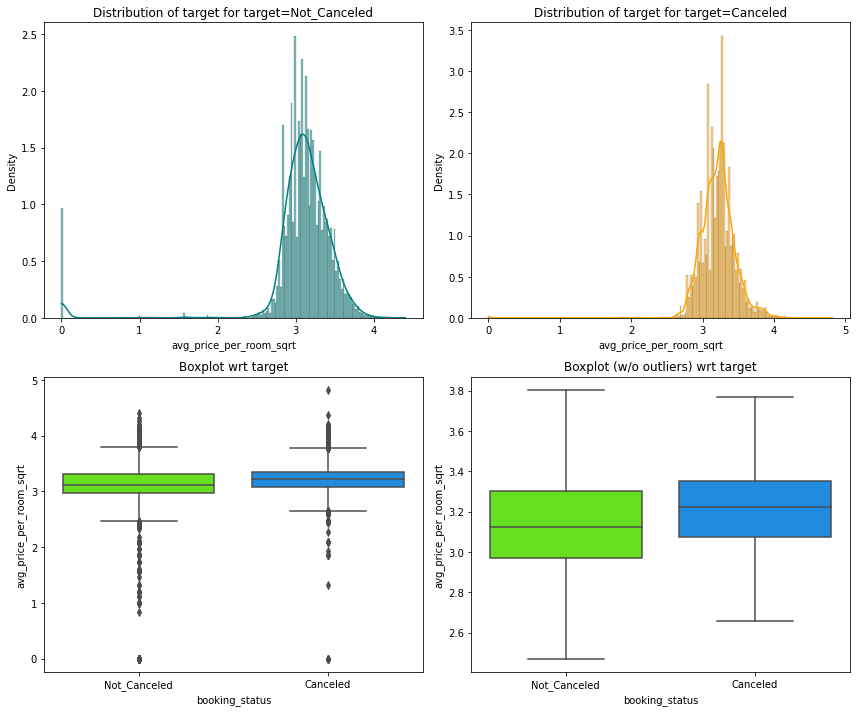

<IPython.core.display.Javascript object>

In [110]:
distribution_plot_wrt_target(df, "avg_price_per_room_sqrt", "booking_status")

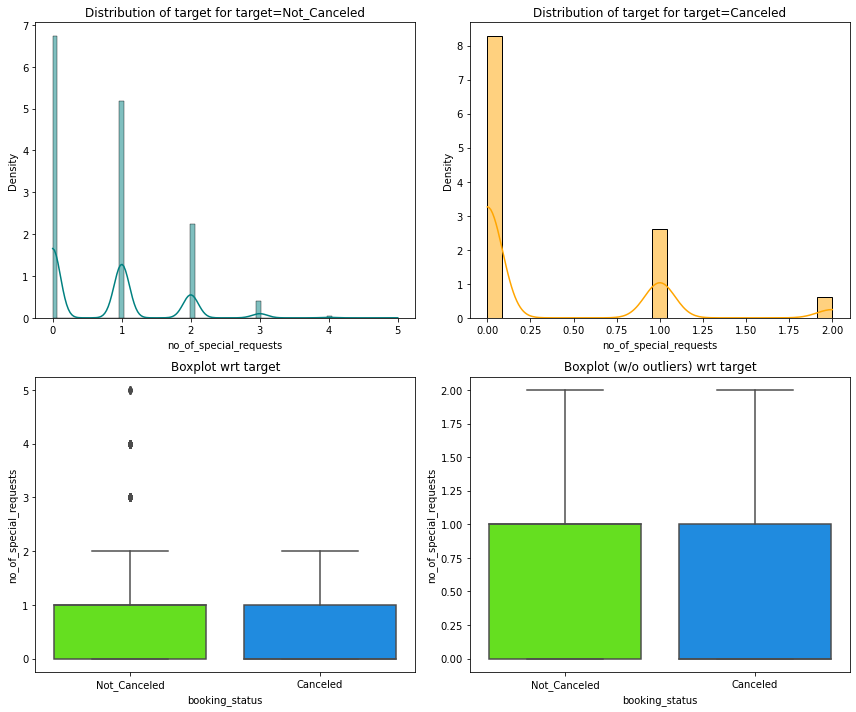

<IPython.core.display.Javascript object>

In [111]:
distribution_plot_wrt_target(df, "no_of_special_requests", "booking_status")

**Observations:**

 - Lower rate of cancellations for bookings that chose Meal Plan 3.
 - Very low cancellation rate (around 10%) for bookings that required a parking space.
 - Highest cancellation rate (around 40%) amongst those that booked Room Type 6. Lowest amongst bookings for Room Type 7 (around 23%).
 - Lowest cancellation rate in January (around 5%) and highest in July (around 45%).
 - 2017 saw less cancellations than 2018.
 - Complimentary bookings were never cancelled and online bookings were cancelled the most.
 - Repeat guests were much less likely to cancel than new guests.

# Logistic Regression Model

In [112]:
# creating copy of df
data = df.copy()

<IPython.core.display.Javascript object>

In [113]:
# dropping target variable from data set and assigning it to Y
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# creating dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)



<IPython.core.display.Javascript object>

In [115]:
print("Shape of Training Set:", X_train.shape)
print("Shape of Test Set:", X_test.shape)
print("Percentage classes in Train Set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Test Set:")
print(y_test.value_counts(normalize=True))

Shape of Training Set: (25392, 27)
Shape of Test Set: (10883, 27)
Percentage booking_status in Train Set:
Not_Canceled    0.670644
Canceled        0.329356
Name: booking_status, dtype: float64
Percentage of booking_status in Test Set:
Not_Canceled    0.676376
Canceled        0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [151]:
# creating a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute f1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [117]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observations as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

<IPython.core.display.Javascript object>

In [121]:
# dropping target variable from data set and assigning it to Y
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# creating dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)

# adding a constant
X = sm.add_constant(X)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [157]:
# fitting the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3325
Time:                        23:19:43   Log-Likelihood:                -10742.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1002.6669    121.191     -8.273      0.000   -1240.196    -765.138
no_of_adults                             0.0755      

<IPython.core.display.Javascript object>

In [139]:
# creating copy because I need to test the cell below this one 
y_train_example = y_train.copy()

<IPython.core.display.Javascript object>

In [143]:
# this is a test to see about changing the data types of Canceled and Not_Canceled to 1 and 0 respectively
y_train_example = y_train_example.replace({"Canceled": 1, "Not_Canceled": 0})

<IPython.core.display.Javascript object>

In [144]:
y_train_example

13662    1
26641    0
17835    0
21485    1
5670     1
        ..
7813     1
32511    1
5192     1
12172    0
33003    1
Name: booking_status, Length: 25392, dtype: int64

<IPython.core.display.Javascript object>

The dtype seems to be correct so I will make the same change above to y_train series.

In [146]:
# changing the data type of y_train to 1 and 0 instead of Canceled and Not_Canceled respectively.
y_train = y_train.replace({"Canceled": 1, "Not_Canceled": 0})

<IPython.core.display.Javascript object>

In [149]:
# checking the dtype
y_train

13662    1
26641    0
17835    0
21485    1
5670     1
        ..
7813     1
32511    1
5192     1
12172    0
33003    1
Name: booking_status, Length: 25392, dtype: int64

<IPython.core.display.Javascript object>

I will scroll back up after fixing the bug and run the logit regression again.

Here is the error code I was receiving when trying to run the logit regression above:

**Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).**

In [183]:
y_test

30392    Not_Canceled
6685         Canceled
8369     Not_Canceled
2055     Not_Canceled
10969        Canceled
             ...     
12013    Not_Canceled
4840     Not_Canceled
34313    Not_Canceled
27390        Canceled
9399         Canceled
Name: booking_status, Length: 10883, dtype: object

<IPython.core.display.Javascript object>

In [184]:
# changing the data type of y_test to 1 and 0 instead of Canceled and Not_Canceled respectively.
y_test = y_test.replace({"Canceled": 1, "Not_Canceled": 0})

<IPython.core.display.Javascript object>

In [185]:
y_test

30392    0
6685     1
8369     0
2055     0
10969    1
        ..
12013    0
4840     0
34313    0
27390    1
9399     1
Name: booking_status, Length: 10883, dtype: int64

<IPython.core.display.Javascript object>

In [152]:
print("Training Performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.805214,0.645821,0.731347,0.685928


<IPython.core.display.Javascript object>

### Checking for Multicollinearity

In [153]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.839545e+07
no_of_adults                            1.342847e+00
no_of_children                          1.959945e+00
no_of_weekend_nights                    1.063733e+00
no_of_week_nights                       1.103692e+00
required_car_parking_space              1.038980e+00
arrival_year                            1.392441e+00
arrival_month                           1.242245e+00
arrival_date                            1.006533e+00
repeated_guest                          1.784692e+00
no_of_previous_cancellations            1.395708e+00
no_of_previous_bookings_not_canceled    1.652068e+00
no_of_special_requests                  1.246936e+00
lead_time_sqrt                          1.407551e+00
avg_price_per_room_sqrt                 2.311432e+00
type_of_meal_plan_Meal Plan 2           1.194644e+00
type_of_meal_plan_Meal Plan 3           1.025212e+00
type_of_meal_plan_Not Selected          1.249218e+00
room_type_r

<IPython.core.display.Javascript object>

In [155]:
# dropping market_segment_type_Online
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series1))

Series before feature selection: 
\const                                   3.831467e+07
no_of_adults                            1.326556e+00
no_of_children                          1.958874e+00
no_of_weekend_nights                    1.063119e+00
no_of_week_nights                       1.102759e+00
required_car_parking_space              1.038893e+00
arrival_year                            1.389852e+00
arrival_month                           1.241153e+00
arrival_date                            1.006518e+00
repeated_guest                          1.781517e+00
no_of_previous_cancellations            1.395463e+00
no_of_previous_bookings_not_canceled    1.651834e+00
no_of_special_requests                  1.241779e+00
lead_time_sqrt                          1.399707e+00
avg_price_per_room_sqrt                 2.311431e+00
type_of_meal_plan_Meal Plan 2           1.194399e+00
type_of_meal_plan_Meal Plan 3           1.025212e+00
type_of_meal_plan_Not Selected          1.247421e+00
room_type_r

<IPython.core.display.Javascript object>

**Observations:**

Dropping market_segment_type_Online has made all columns drop below 5. I will now re-run the model.

In [158]:
# fitting the logistic regression model without market_segment_type_Online
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3321
Time:                        23:21:53   Log-Likelihood:                -10748.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1023.6316    120.943     -8.464      0.000   -1260.675    -786.588
no_of_adults                             0.0598      

,Accuracy,Recall,Precision,F1
0,0.805175,0.64594,0.731186,0.685925


<IPython.core.display.Javascript object>

**Observation:**

No significant change in performance. I will now see about dropping market_segment_type_Complementary and see if dropping this will change the model performance.

In [159]:
# dropping market_segment_type_Complementary
X_train2 = X_train1.drop("market_segment_type_Complementary", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series2))

Series before feature selection: 
\const                                   3.798606e+07
no_of_adults                            1.322700e+00
no_of_children                          1.956782e+00
no_of_weekend_nights                    1.059474e+00
no_of_week_nights                       1.101630e+00
required_car_parking_space              1.038239e+00
arrival_year                            1.377638e+00
arrival_month                           1.235467e+00
arrival_date                            1.006516e+00
repeated_guest                          1.769484e+00
no_of_previous_cancellations            1.393591e+00
no_of_previous_bookings_not_canceled    1.650162e+00
no_of_special_requests                  1.240950e+00
lead_time_sqrt                          1.383728e+00
avg_price_per_room_sqrt                 1.224244e+00
type_of_meal_plan_Meal Plan 2           1.183908e+00
type_of_meal_plan_Meal Plan 3           1.021724e+00
type_of_meal_plan_Not Selected          1.232992e+00
room_type_r

<IPython.core.display.Javascript object>

**Observations:**

Dropping the market_segment_type_Complementary columnn has brought all the vif_scores under 2. I will now re-run the model and check the performance.

In [160]:
# fitting the logistic regression model without market_segment_type_Complementary
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3319
Time:                        23:31:16   Log-Likelihood:                -10750.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1017.5391    120.835     -8.421      0.000   -1254.371    -780.707
no_of_adults                             0.0611      

,Accuracy,Recall,Precision,F1
0,0.805135,0.645701,0.731212,0.685801


<IPython.core.display.Javascript object>

**Observation:**

No significant change in model performance. We seem to have taken care of Multicollinearity. Now we will move on to the columns that have p-values > .05

This includes no_of_adults, no_of_week_nights, arrival_date, no_of_previous_bookings_not_canceled, type_of_Meal Plan 3, room_type_reserved_Room_Type 3.

In [162]:
# dropping room_type_reserved_Room_Type 3
X_train3 = X_train2.drop("room_type_reserved_Room_Type 3", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series3))

Series before feature selection: 
\const                                   3.798558e+07
no_of_adults                            1.322685e+00
no_of_children                          1.956780e+00
no_of_weekend_nights                    1.059464e+00
no_of_week_nights                       1.101594e+00
required_car_parking_space              1.038239e+00
arrival_year                            1.377620e+00
arrival_month                           1.235268e+00
arrival_date                            1.006492e+00
repeated_guest                          1.769403e+00
no_of_previous_cancellations            1.393589e+00
no_of_previous_bookings_not_canceled    1.650162e+00
no_of_special_requests                  1.240782e+00
lead_time_sqrt                          1.383728e+00
avg_price_per_room_sqrt                 1.223007e+00
type_of_meal_plan_Meal Plan 2           1.183892e+00
type_of_meal_plan_Meal Plan 3           1.021719e+00
type_of_meal_plan_Not Selected          1.232959e+00
room_type_r

<IPython.core.display.Javascript object>

In [163]:
# fitting the logistic regression model without room_type_reserved_Room_Type 3
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3319
Time:                        23:45:05   Log-Likelihood:                -10750.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1017.4324    120.833     -8.420      0.000   -1254.261    -780.603
no_of_adults                             0.0611      

,Accuracy,Recall,Precision,F1
0,0.805175,0.645701,0.731311,0.685845


<IPython.core.display.Javascript object>

**Observations:**

No significant change in model performance. Will now drop arrival_date and check model performance.

In [164]:
# dropping arrival_date
X_train4 = X_train3.drop("arrival_date", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series4))

Series before feature selection: 
\const                                   3.798554e+07
no_of_adults                            1.322319e+00
no_of_children                          1.956469e+00
no_of_weekend_nights                    1.058639e+00
no_of_week_nights                       1.101326e+00
required_car_parking_space              1.038196e+00
arrival_year                            1.377620e+00
arrival_month                           1.233239e+00
repeated_guest                          1.769009e+00
no_of_previous_cancellations            1.393519e+00
no_of_previous_bookings_not_canceled    1.650130e+00
no_of_special_requests                  1.240496e+00
lead_time_sqrt                          1.383586e+00
avg_price_per_room_sqrt                 1.222995e+00
type_of_meal_plan_Meal Plan 2           1.183000e+00
type_of_meal_plan_Meal Plan 3           1.021702e+00
type_of_meal_plan_Not Selected          1.232872e+00
room_type_reserved_Room_Type 2          1.098489e+00
room_type_r

<IPython.core.display.Javascript object>

In [165]:
# fitting the logistic regression model without arrival_date
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg4, X_train4, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3319
Time:                        23:48:35   Log-Likelihood:                -10750.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1017.3295    120.850     -8.418      0.000   -1254.190    -780.469
no_of_adults                             0.0618      

,Accuracy,Recall,Precision,F1
0,0.804978,0.645821,0.730754,0.685667


<IPython.core.display.Javascript object>

**Observation:**

No significant change in model performance. Will now drop type_of_meal_plan_Meal Plan 3 and check model performance.

In [167]:
# dropping type_of_meal_plan_Meal Plan 3
X_train5 = X_train4.drop("type_of_meal_plan_Meal Plan 3", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series5))

Series before feature selection: 
\const                                   3.798387e+07
no_of_adults                            1.322236e+00
no_of_children                          1.955909e+00
no_of_weekend_nights                    1.058587e+00
no_of_week_nights                       1.101326e+00
required_car_parking_space              1.038010e+00
arrival_year                            1.377558e+00
arrival_month                           1.233149e+00
repeated_guest                          1.768992e+00
no_of_previous_cancellations            1.393473e+00
no_of_previous_bookings_not_canceled    1.650003e+00
no_of_special_requests                  1.240491e+00
lead_time_sqrt                          1.383516e+00
avg_price_per_room_sqrt                 1.217136e+00
type_of_meal_plan_Meal Plan 2           1.182970e+00
type_of_meal_plan_Not Selected          1.232843e+00
room_type_reserved_Room_Type 2          1.098488e+00
room_type_reserved_Room_Type 4          1.291846e+00
room_type_r

<IPython.core.display.Javascript object>

In [168]:
# fitting the logistic regression model without type_of_meal_plan_Meal Plan 3
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg5, X_train5, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3318
Time:                        23:54:24   Log-Likelihood:                -10752.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1012.6947    120.790     -8.384      0.000   -1249.439    -775.950
no_of_adults                             0.0618      

,Accuracy,Recall,Precision,F1
0,0.804978,0.645701,0.730816,0.685627


<IPython.core.display.Javascript object>

**Observation:**

No significant change in model performance. Will now drop no_of_previous_bookings_not_canceled and check model performance.

In [169]:
# dropping no_of_previous_bookings_not_canceled
X_train6 = X_train5.drop("no_of_previous_bookings_not_canceled", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series6))

Series before feature selection: 
\const                             3.786462e+07
no_of_adults                      1.321851e+00
no_of_children                    1.955843e+00
no_of_weekend_nights              1.058268e+00
no_of_week_nights                 1.101171e+00
required_car_parking_space        1.037969e+00
arrival_year                      1.373225e+00
arrival_month                     1.232587e+00
repeated_guest                    1.555852e+00
no_of_previous_cancellations      1.204607e+00
no_of_special_requests            1.236567e+00
lead_time_sqrt                    1.383314e+00
avg_price_per_room_sqrt           1.213231e+00
type_of_meal_plan_Meal Plan 2     1.182411e+00
type_of_meal_plan_Not Selected    1.232802e+00
room_type_reserved_Room_Type 2    1.098488e+00
room_type_reserved_Room_Type 4    1.291827e+00
room_type_reserved_Room_Type 5    1.012762e+00
room_type_reserved_Room_Type 6    1.845593e+00
room_type_reserved_Room_Type 7    1.048455e+00
market_segment_type_Corpo

<IPython.core.display.Javascript object>

In [170]:
# fitting the logistic regression model without no_of_previous_bookings_not_canceled
logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit(disp=False)

print(lg6.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg6, X_train6, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.3318
Time:                        23:58:19   Log-Likelihood:                -10753.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1010.6147    120.801     -8.366      0.000   -1247.380    -773.850
no_of_adults                       0.0617      0.038      1.639      0.

,Accuracy,Recall,Precision,F1
0,0.804978,0.645821,0.730754,0.685667


<IPython.core.display.Javascript object>

**Observations:**

No significant change in model performance. Will now drop no_of_week_nights and check model performance.

In [171]:
# dropping no_of_week_nights
X_train7 = X_train6.drop("no_of_week_nights", axis=1)
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])],
    index=X_train7.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series7))

Series before feature selection: 
\const                             3.782785e+07
no_of_adults                      1.321776e+00
no_of_children                    1.955394e+00
no_of_weekend_nights              1.035333e+00
required_car_parking_space        1.037034e+00
arrival_year                      1.371906e+00
arrival_month                     1.232583e+00
repeated_guest                    1.554915e+00
no_of_previous_cancellations      1.204606e+00
no_of_special_requests            1.236327e+00
lead_time_sqrt                    1.342580e+00
avg_price_per_room_sqrt           1.212654e+00
type_of_meal_plan_Meal Plan 2     1.175340e+00
type_of_meal_plan_Not Selected    1.229951e+00
room_type_reserved_Room_Type 2    1.098417e+00
room_type_reserved_Room_Type 4    1.286288e+00
room_type_reserved_Room_Type 5    1.012711e+00
room_type_reserved_Room_Type 6    1.845593e+00
room_type_reserved_Room_Type 7    1.048390e+00
market_segment_type_Corporate     1.463180e+00
market_segment_type_Offli

<IPython.core.display.Javascript object>

In [172]:
# fitting the logistic regression model without no_of_week_nights
logit7 = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit7.fit(disp=False)

print(lg7.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg7, X_train7, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3317
Time:                        00:02:02   Log-Likelihood:                -10754.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1011.5809    120.845     -8.371      0.000   -1248.433    -774.728
no_of_adults                       0.0615      0.038      1.633      0.

,Accuracy,Recall,Precision,F1
0,0.804663,0.645701,0.730026,0.685279


<IPython.core.display.Javascript object>

**Observations:**

No significant change to model performance. Will now drop no_of_adults and check model performance.

In [173]:
# dropping no_of_adults
X_train8 = X_train7.drop("no_of_adults", axis=1)
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])],
    index=X_train8.columns,
)
print("Series before feature selection: \n\{}\n".format(vif_series8))

Series before feature selection: 
\const                             3.779806e+07
no_of_children                    1.929250e+00
no_of_weekend_nights              1.032427e+00
required_car_parking_space        1.036336e+00
arrival_year                      1.370857e+00
arrival_month                     1.231856e+00
repeated_guest                    1.551597e+00
no_of_previous_cancellations      1.204400e+00
no_of_special_requests            1.219525e+00
lead_time_sqrt                    1.320223e+00
avg_price_per_room_sqrt           1.182560e+00
type_of_meal_plan_Meal Plan 2     1.175165e+00
type_of_meal_plan_Not Selected    1.226975e+00
room_type_reserved_Room_Type 2    1.095446e+00
room_type_reserved_Room_Type 4    1.206831e+00
room_type_reserved_Room_Type 5    1.012353e+00
room_type_reserved_Room_Type 6    1.827082e+00
room_type_reserved_Room_Type 7    1.039931e+00
market_segment_type_Corporate     1.407851e+00
market_segment_type_Offline       1.514384e+00
dtype: float64



<IPython.core.display.Javascript object>

In [174]:
# fitting the logistic regression model without no_of_adults
logit8 = sm.Logit(y_train, X_train8.astype(float))
lg8 = logit8.fit(disp=False)

print(lg8.summary())
print("Training performance:")
model_performance_classification_statsmodels(lg8, X_train8, y_train)

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3316
Time:                        00:05:22   Log-Likelihood:                -10755.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1001.9072    120.710     -8.300      0.000   -1238.494    -765.320
no_of_children                     0.1297      0.058      2.235      0.

,Accuracy,Recall,Precision,F1
0,0.804742,0.645462,0.730348,0.685286


<IPython.core.display.Javascript object>

**Observations:**

No significant change to model performance. This is our best model. I will now check the model on test data set.

### Convert Coefficients to Odds

In [247]:
lg8.params

const                            -1001.907162
no_of_children                       0.129694
no_of_weekend_nights                 0.088396
required_car_parking_space          -1.588526
arrival_year                         0.491669
arrival_month                       -0.030581
repeated_guest                      -2.436421
no_of_previous_cancellations         0.241770
no_of_special_requests              -1.495667
lead_time_sqrt                       0.297429
avg_price_per_room_sqrt              2.520820
type_of_meal_plan_Meal Plan 2        0.270583
type_of_meal_plan_Not Selected       0.322368
room_type_reserved_Room_Type 2      -0.391385
room_type_reserved_Room_Type 4      -0.286944
room_type_reserved_Room_Type 5      -0.708165
room_type_reserved_Room_Type 6      -0.576846
room_type_reserved_Room_Type 7      -0.825277
market_segment_type_Corporate       -0.752118
market_segment_type_Offline         -1.804172
dtype: float64

<IPython.core.display.Javascript object>

In [249]:
# converting coefficients to odds
odds = np.exp(lg8.params)

# finding the perentage change
perc_change_odds = (np.exp(lg8.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train8.columns).T

,const,no_of_children,no_of_weekend_nights,required_car_parking_space,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_special_requests,lead_time_sqrt,avg_price_per_room_sqrt,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.138480,1.092420,0.204226,1.635043,0.969882,0.087473,1.273501,0.224099,1.346393,12.438796,1.310729,1.380393,0.676120,0.750554,0.492547,0.561667,0.438114,0.471367,0.164611
Change_odd%,-100.0,13.847994,9.242025,-79.577359,63.504256,-3.011826,-91.252660,27.350131,-77.590096,34.639268,1143.879562,31.072886,38.039286,-32.388028,-24.944591,-50.745284,-43.833307,-56.188632,-52.863300,-83.538923


<IPython.core.display.Javascript object>

### Checking Model Performance on Train Set

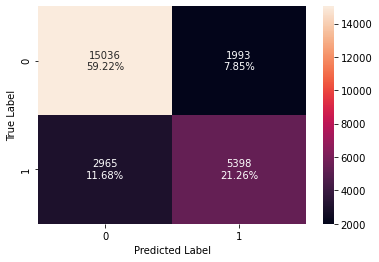

<IPython.core.display.Javascript object>

In [177]:
confusion_matrix_statsmodels(lg8, X_train8, y_train)

In [178]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg8, X_train8, y_train
)

print("Training Performance:")
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.804742,0.645462,0.730348,0.685286


<IPython.core.display.Javascript object>

### ROC-AUC on Train Set 

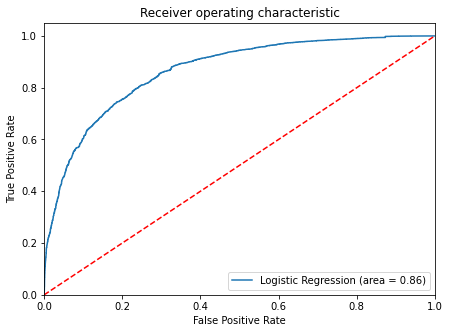

<IPython.core.display.Javascript object>

In [179]:
logit_roc_auc_train = roc_auc_score(y_train, lg8.predict(X_train8))
fpr, tpr, thresholds = roc_curve(y_train, lg8.predict(X_train8))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal Threshold using ROC-AUV Curve

In [250]:
# optimal threshold as per AUC-ROC curve
# optimal cutoff would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg8.predict(X_train8))

optimal_idx = np.argmax(tpr - fpr)
print(optimal_idx)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

3934
0.31553963216603


<IPython.core.display.Javascript object>

### Checking Model Performance on Train Set

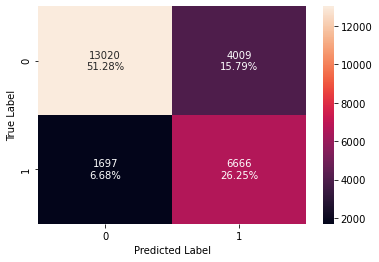

<IPython.core.display.Javascript object>

In [251]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg8, X_train8, y_train, threshold=optimal_threshold_auc_roc
)

In [253]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg8, X_train8, y_train, threshold=optimal_threshold_auc_roc
)
print("Training Performance:")
log_reg_model_train_perf_threshold_auc_roc

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.775284,0.797082,0.62445,0.700284


<IPython.core.display.Javascript object>

# Decision Tree

We have already created the copy of our df (namely data) and and split the data so we don't need to prepare our data since it is already split and has the dummies created.

In [181]:
# function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [182]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [187]:
# libaries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [188]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [189]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

### Checking Model Performance on Train Set

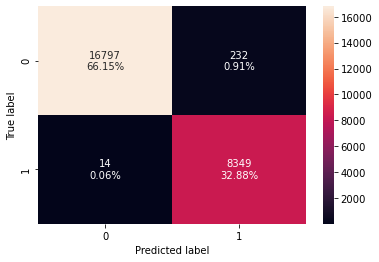

<IPython.core.display.Javascript object>

In [190]:
confusion_matrix_sklearn(model, X_train, y_train)

In [191]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9983259595838814


<IPython.core.display.Javascript object>

### Checking Model Performance on Test Set

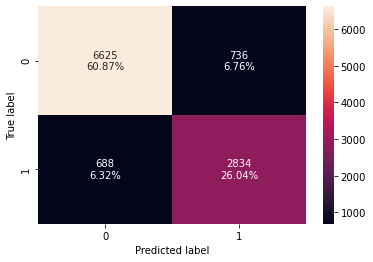

<IPython.core.display.Javascript object>

In [192]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

### Visualizing Decision Tree

In [199]:
# creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

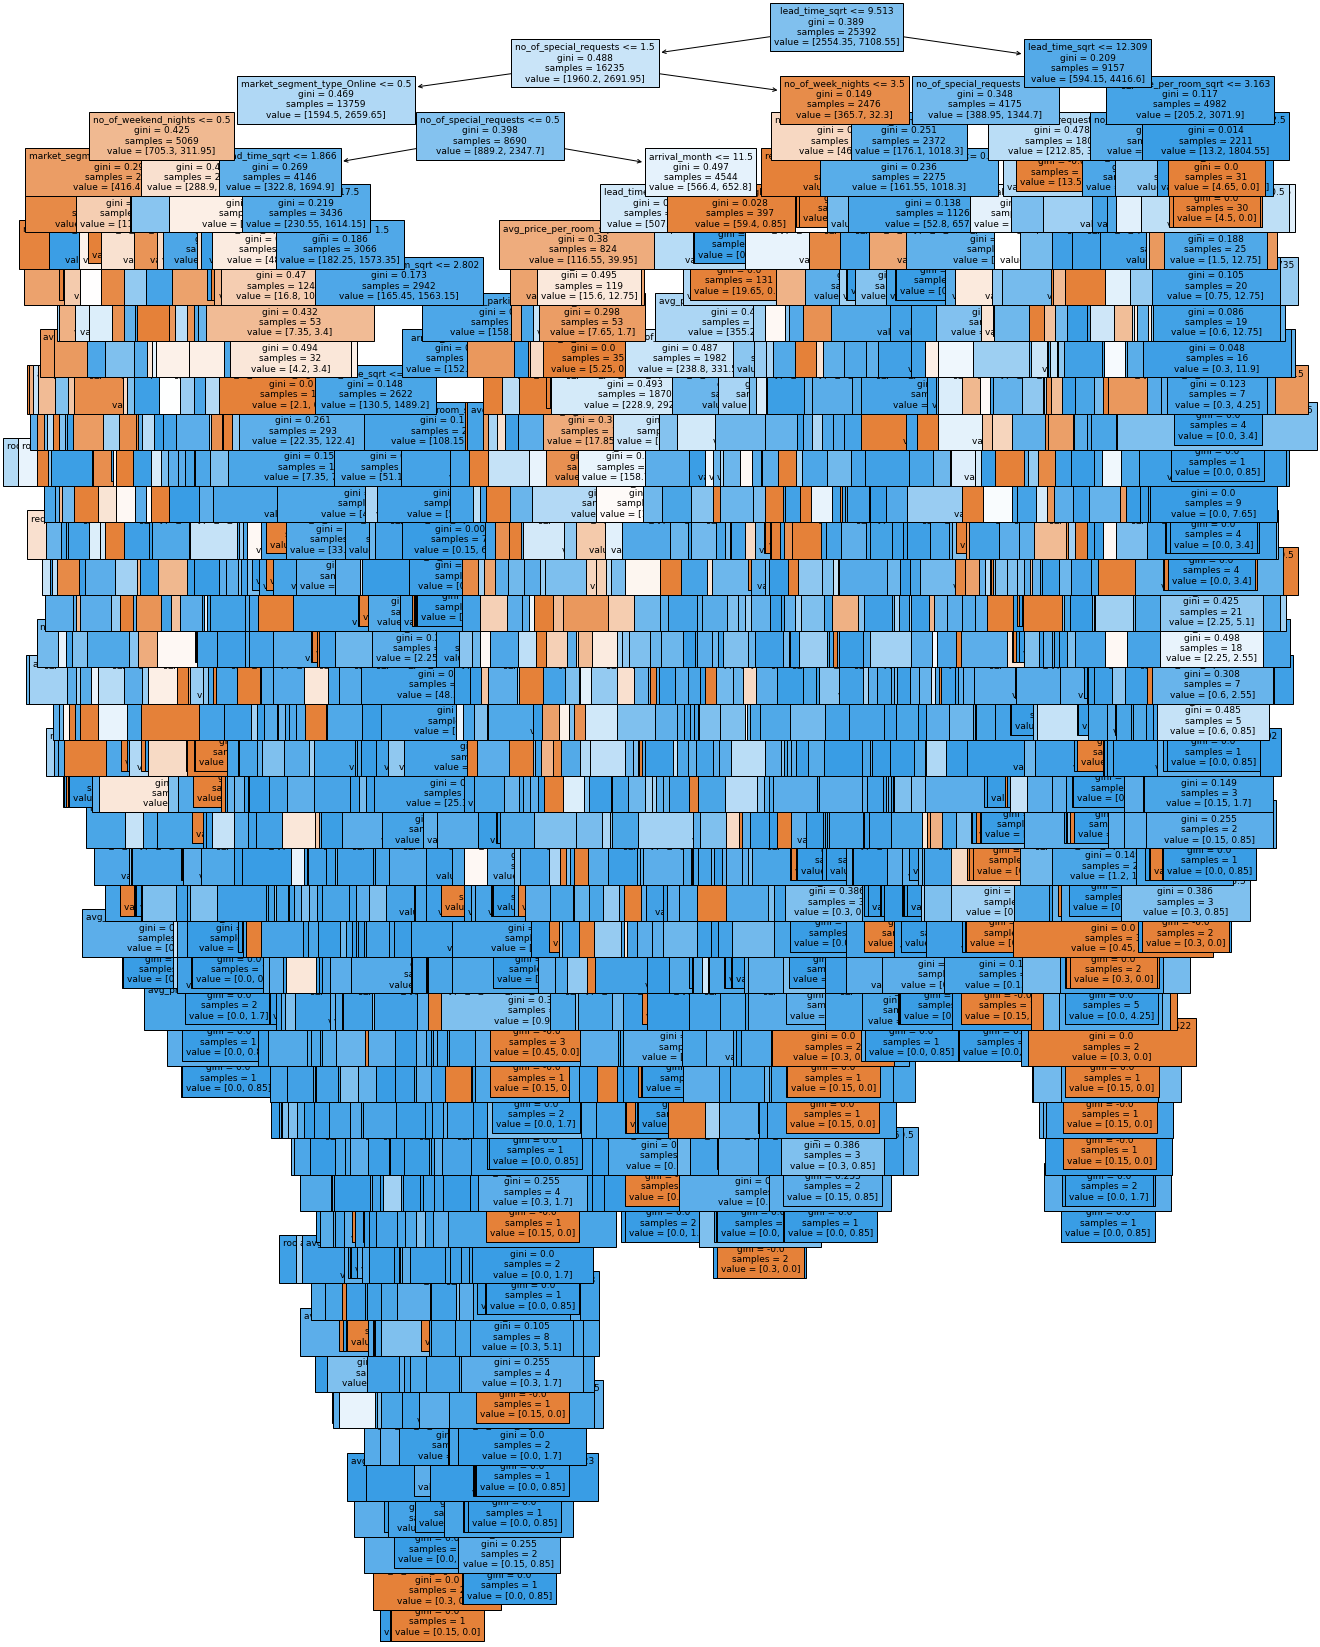

<IPython.core.display.Javascript object>

In [200]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [202]:
# text report that shows Decicision Tree rules
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time_sqrt <= 9.51
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |--- avg_price_per_room_sqrt <= 3.76
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room_sqrt <= 3.10
|   |   |   |   |   |   |   |   |--- weights: [25.65, 0.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room_sqrt >  3.10
|   |   |   |   |   |   |   |   |--- arrival_date <= 23.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 19.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time_sqrt <= 1.87
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- lead_time_sqrt >  1.87
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- arriv

<IPython.core.display.Javascript object>

In [203]:
# viewing the importance of features in tree building
# this is computed as the normalized total reduction of the criterion brought by that feature, aka gini importance
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time_sqrt                        0.286820
avg_price_per_room_sqrt               0.135739
no_of_special_requests                0.132101
arrival_date                          0.088481
arrival_month                         0.088217
market_segment_type_Online            0.084460
no_of_week_nights                     0.044404
no_of_weekend_nights                  0.038554
no_of_adults                          0.022846
arrival_year                          0.017518
room_type_reserved_Room_Type 4        0.009863
market_segment_type_Offline           0.009463
required_car_parking_space            0.008873
market_segment_type_Corporate         0.007666
type_of_meal_plan_Not Selected        0.007371
repeated_guest                        0.005400
no_of_children                        0.004847
type_of_meal_plan_Meal Plan 2         0.003029
room_type_reserved_Room_Type 2        0.002419
room_type_reserved_Room_Type 5        0.000676
room_type_res

<IPython.core.display.Javascript object>

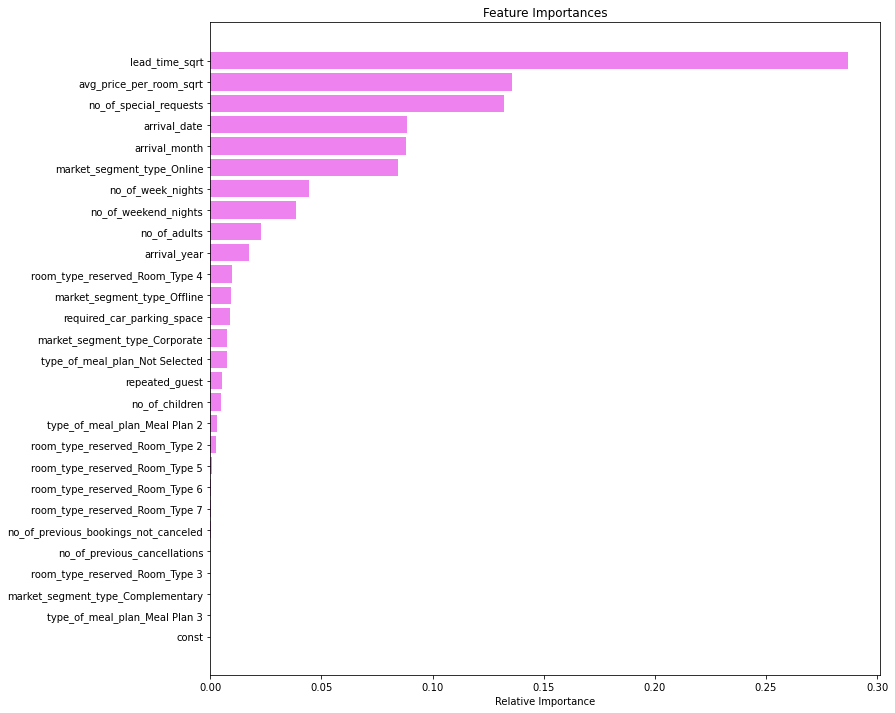

<IPython.core.display.Javascript object>

In [204]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [208]:
from sklearn.metrics import make_scorer

# choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# run the gridsearch
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.01, random_state=1)

<IPython.core.display.Javascript object>

### Check Performance on Train Set

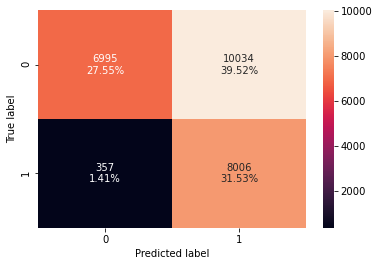

<IPython.core.display.Javascript object>

In [209]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [210]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9573119693889752


<IPython.core.display.Javascript object>

### Check Performance on Test Set

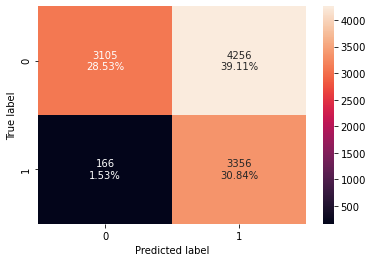

<IPython.core.display.Javascript object>

In [211]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [212]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9528676888131743


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

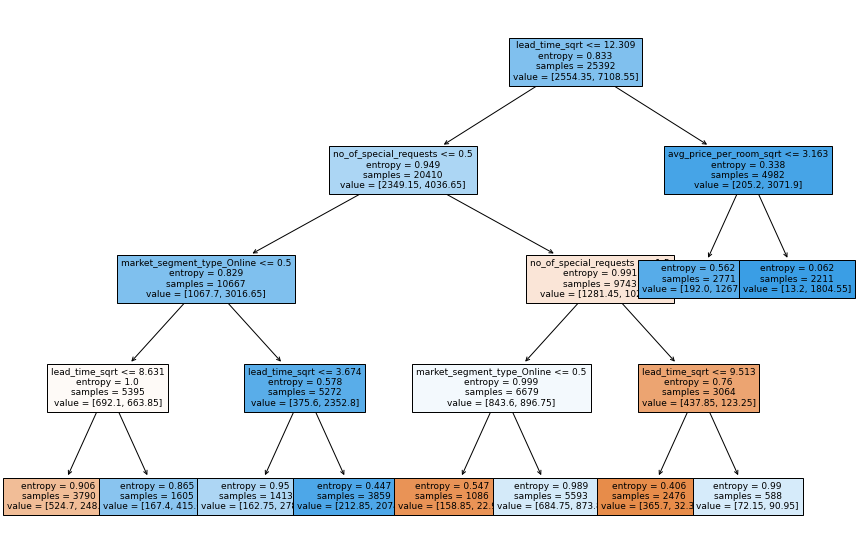

<IPython.core.display.Javascript object>

In [213]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [214]:
# text report showing the Decision Tree rules
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_sqrt <= 12.31
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_sqrt <= 8.63
|   |   |   |   |--- weights: [524.70, 248.20] class: 0
|   |   |   |--- lead_time_sqrt >  8.63
|   |   |   |   |--- weights: [167.40, 415.65] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time_sqrt <= 3.67
|   |   |   |   |--- weights: [162.75, 278.80] class: 1
|   |   |   |--- lead_time_sqrt >  3.67
|   |   |   |   |--- weights: [212.85, 2074.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [158.85, 22.95] class: 0
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [684.75, 873.80] class: 1
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- lead_time_sqrt <= 9.51
|   |   |   |   |--- weights: [365.70, 32.30] class: 0
|   |   |   

<IPython.core.display.Javascript object>

In [216]:
# viewing the importance of features in tree building
# this is computed as the normalized total reduction of the criterion brought by that feature, aka gini importance
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time_sqrt                        0.508152
market_segment_type_Online            0.219333
no_of_special_requests                0.203048
avg_price_per_room_sqrt               0.069467
no_of_week_nights                     0.000000
required_car_parking_space            0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Not Selected        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_adults                          0.000000
no_of_children                        0.000000
no_of_weekend

<IPython.core.display.Javascript object>

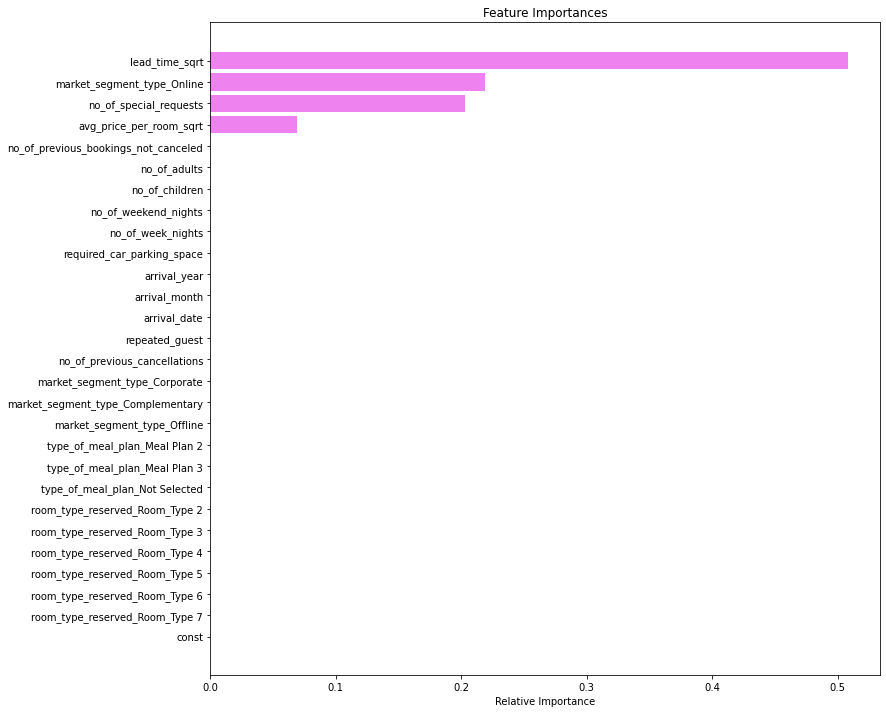

<IPython.core.display.Javascript object>

In [217]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [218]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [219]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.006774
1,1.034059e-20,0.006774
2,1.034059e-20,0.006774
3,1.034059e-20,0.006774
4,1.034059e-20,0.006774
...,...,...
1824,5.456394e-03,0.272057
1825,6.138880e-03,0.278196
1826,1.459269e-02,0.292789
1827,2.518565e-02,0.343160


<IPython.core.display.Javascript object>

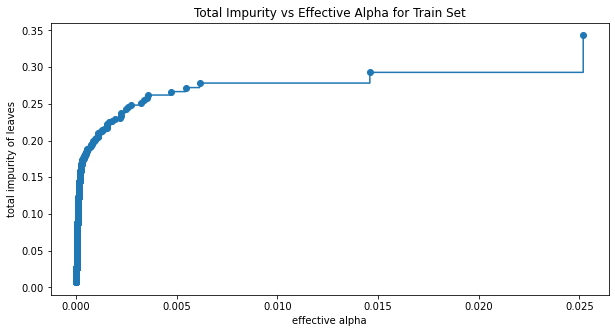

<IPython.core.display.Javascript object>

In [220]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for Train Set")
plt.show()

In [221]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04577428273915907


<IPython.core.display.Javascript object>

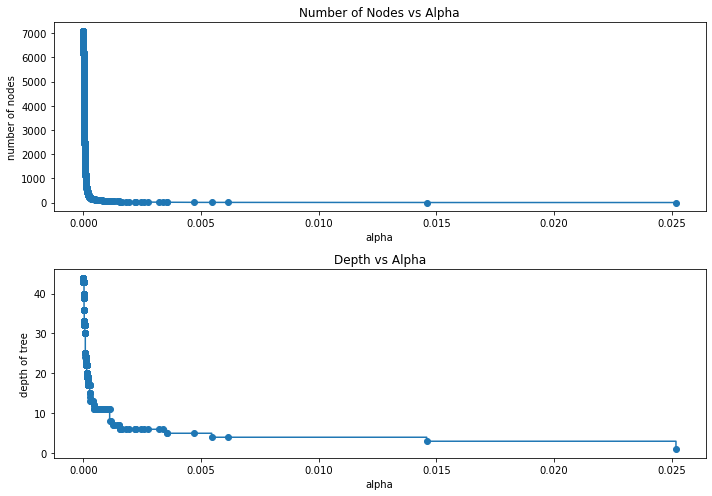

<IPython.core.display.Javascript object>

In [222]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

In [223]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [225]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [226]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

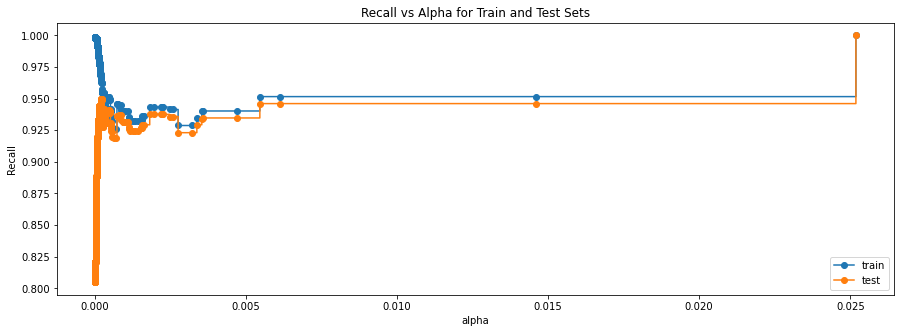

<IPython.core.display.Javascript object>

In [227]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for Train and Test Sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [228]:
# creating the model where we get the highest test and train recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.02518564875539904,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [229]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02518564875539904,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

### Checking Performance on Train Set

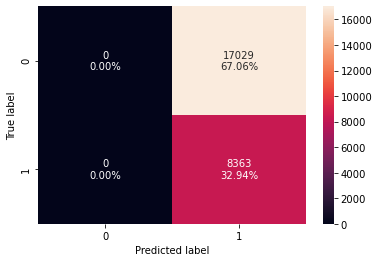

<IPython.core.display.Javascript object>

In [230]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [231]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

### Check Performance on Test Set

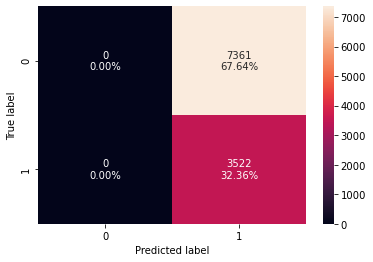

<IPython.core.display.Javascript object>

In [232]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [233]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 1.0


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

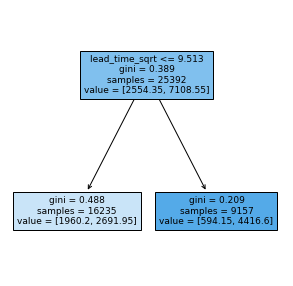

<IPython.core.display.Javascript object>

In [234]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [235]:
# now attempting with alpha = .015
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.015, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

### Checking Performance on Train Set

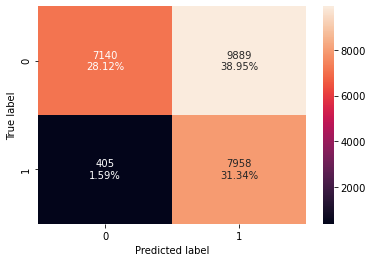

<IPython.core.display.Javascript object>

In [236]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [237]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9515724022479971


<IPython.core.display.Javascript object>

### Checking Performance on Test Set

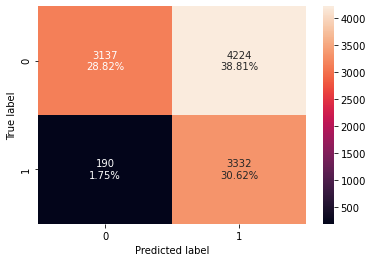

<IPython.core.display.Javascript object>

In [238]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [239]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.946053378762067


<IPython.core.display.Javascript object>

### Visulaizing the Decision Tree

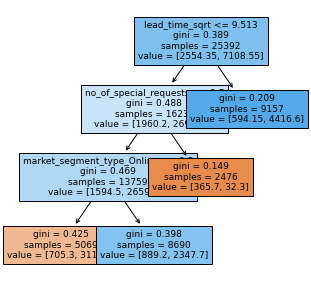

<IPython.core.display.Javascript object>

In [240]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [241]:
# text report showing the Decision Tree rules
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time_sqrt <= 9.51
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [705.30, 311.95] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [889.20, 2347.70] class: 1
|   |--- no_of_special_requests >  1.50
|   |   |--- weights: [365.70, 32.30] class: 0
|--- lead_time_sqrt >  9.51
|   |--- weights: [594.15, 4416.60] class: 1



<IPython.core.display.Javascript object>

In [242]:
# viewing the importance of features in tree building
# this is computed as the normalized total reduction of the criterion brought by that feature, aka gini importance
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time_sqrt                        0.476093
market_segment_type_Online            0.292014
no_of_special_requests                0.231893
type_of_meal_plan_Meal Plan 2         0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Not Selected        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
const                                 0.000000
no_of_adults                          0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date 

<IPython.core.display.Javascript object>

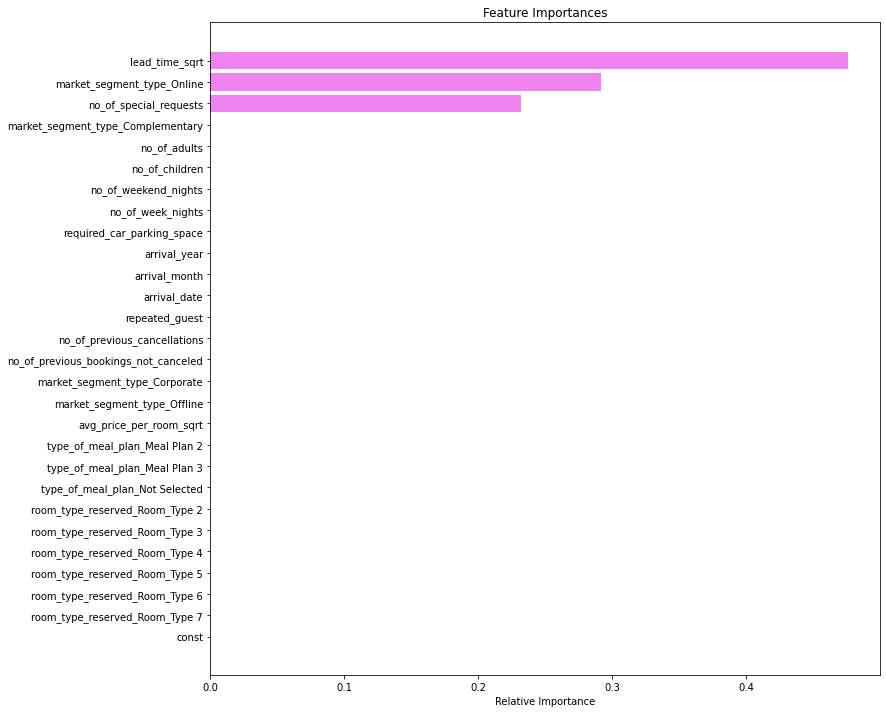

<IPython.core.display.Javascript object>

In [243]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all Decision Tree Models

In [245]:
# training performance comparison
models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on Train Set"],
)

print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


,Recall on Train Set
0,0.998326
1,0.957312
2,0.951572


<IPython.core.display.Javascript object>

In [246]:
# testing performance comparison
models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on Test Set"],
)

print("Testing Performance Comparison:")
models_test_comp_df

Testing Performance Comparison:


,Recall on Test Set
0,0.804656
1,0.952868
2,0.946053


<IPython.core.display.Javascript object>

# Conclusion

After seeing the logit regression model with the metrics Accuracy = 77%, Precision = 79%, Recall = 62% and F1 score of only 70%, it's safe to say that the Decision Tree would be the better option to classify a booking as likely to Cancel.

After pruning and checking the Recall, we can see the the postpruned tree decision_tree_postpruned_perf_test gives us the best option of the "unpruned" tree, prepruned tree and the aforementioned tree.

The lead_time was the most important feature in determining if a booking would be cancelled. The second most important feature was whether the booking was an online booking. The last and only other feature used in our best model was no_of_special_requests.

This tells me that bookings that have long lead times will lean heavier toward a cancellation than those that don't. Online bookings are more easily cancelled than other types so client outreach is really important to avoid cancellations. Lastly, I would suggest that special requests be accomodated to further distance the company from the competitors that may not be so accomodating.